In [52]:
from sklearn import svm
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd

In [44]:
X, Y = datasets.make_classification(n_samples=50, n_classes=5, n_clusters_per_class=1, n_informative=3, random_state=42)

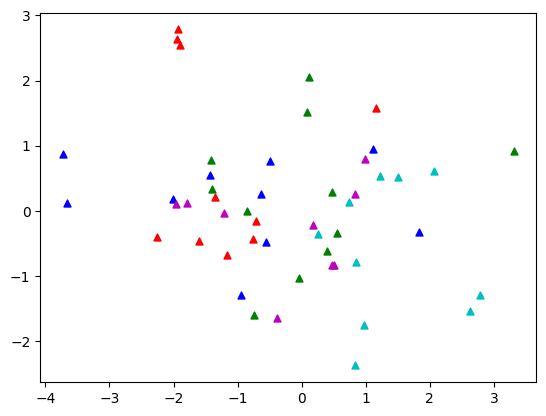

In [28]:
colors = ['b', 'g', 'r', 'c', 'm']

for class_label in range(5):
    class_indices = np.where(Y == class_label)
    plt.scatter(X[class_indices, 0], X[class_indices, 1], marker="^", c=colors[class_label], label=f'Class {class_label}', s=25)

In [25]:
X[:, 1]

array([ 1.5801341 ,  2.05509261,  0.87244716,  0.1278027 , -1.29494247,
        2.78377742,  2.5386911 ,  0.29547752,  1.52378741, -0.4581099 ,
       -0.67641302, -0.62036372, -0.35068153, -2.36972141,  0.20750349,
        0.17618092, -0.40037287, -1.59912347, -0.47738173, -1.52655186,
        0.7959065 , -1.63939627, -0.31784691,  0.33070056,  0.53259511,
       -0.83355899,  0.95201109, -0.42740794, -0.22241278,  0.60756686,
       -0.00329592, -0.14903667,  2.64357158, -1.28844738,  0.26162306,
        0.78400641,  0.52776476, -0.78254371,  0.91982751,  0.26658055,
        0.77067833,  0.12609483,  0.54957635, -0.34320124,  0.13498472,
        0.1047353 , -0.82558484, -1.75310705, -1.02038325, -0.02892488])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
model = svm.SVC(kernel='linear', decision_function_shape='ovr')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [39]:
y_pred = model.predict(X_test)

In [59]:
support_vectors = model.support_

In [60]:
#Visualize 3D

tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_train)

In [72]:
X_support_vectors = X_train[support_vectors]
y_support_vectors = y_train[support_vectors]

data = pd.DataFrame({'Dimension 1': X_tsne[:, 0], 'Dimension 2': X_tsne[:, 1], 'Dimension 3': X_tsne[:, 2], 'Class': y_train})

fig = px.scatter_3d(data, x='Dimension 1', y='Dimension 2', z='Dimension 3', color='Class', size_max=10, symbol='Class', labels={'Class': 'Class Label'})

support_vector_data = pd.DataFrame({'Dimension 1': X_tsne[support_vectors, 0], 'Dimension 2': X_tsne[support_vectors, 1], 'Dimension 3': X_tsne[support_vectors, 2], 'Class': y_support_vectors, 'Support Vector': 'Support Vector'})
fig.add_trace(px.scatter_3d(support_vector_data, x='Dimension 1', y='Dimension 2', z='Dimension 3', color='Support Vector', size_max=20, opacity=1.0).data[0])

fig.show()

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.67      0.57         3
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         3

    accuracy                           0.70        10
   macro avg       0.70      0.63      0.65        10
weighted avg       0.75      0.70      0.70        10

